In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# parse date
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [3]:
# Raw Data Cleaning.
df = pd.read_csv('raw.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
df

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [4]:
# drop previous index row 'No'
df.drop('No', axis=1, inplace=True)
df.head(5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
# manually specify column names
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
df.index.name = 'date'
df.head(30)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [6]:
# mark all NA values with 0
df['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
df = df[24:]
df.head(5)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [7]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

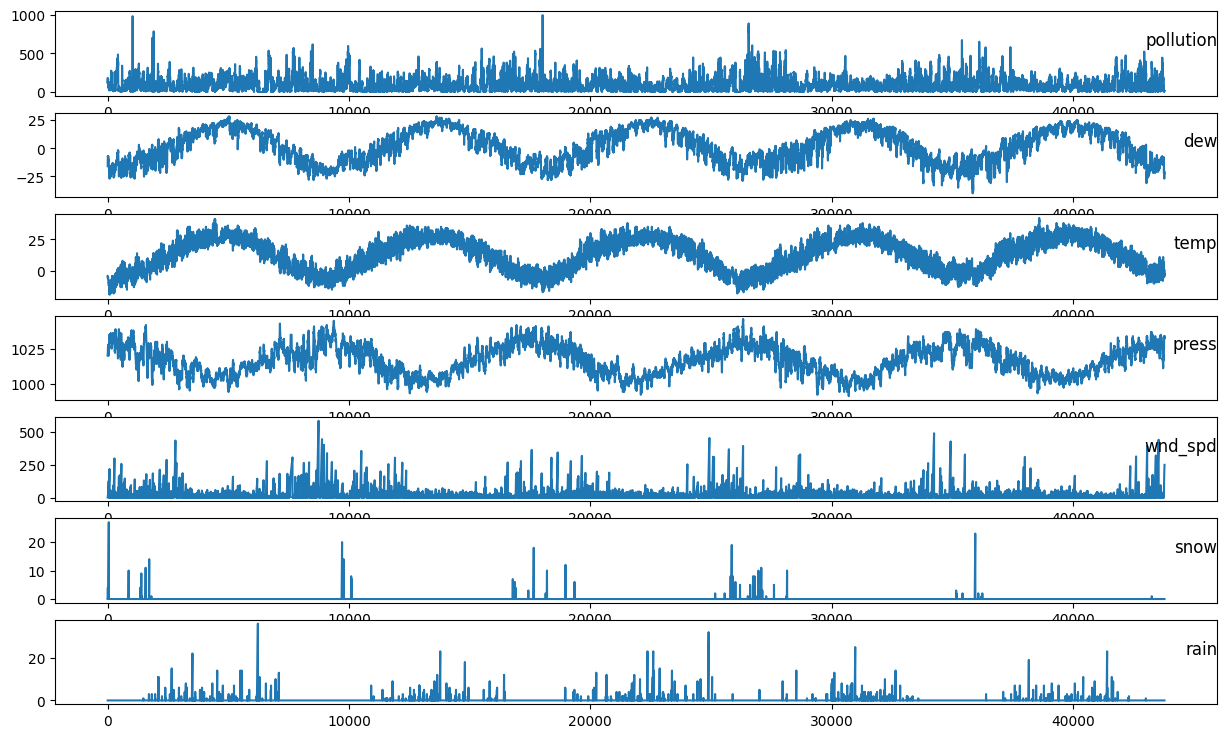

In [8]:
# plot each column
plt.figure(figsize=(15,9))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# LSTM Data Preparation

This formulation is straightforward and just for this demonstration. Some alternate formulations you could explore include:

- Predict the pollution for the next hour based on the weather conditions and pollution over the last 24 hours.
- Predict the pollution for the next hour as above and given the “expected” weather conditions for the next hour.

### [Multivariate Time Series Forecasting with LSTMs in Keras](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/)

In [9]:
# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [10]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [11]:
# get dataframe values.
values = df.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

# Normalize Dataframe Values.

Gia ta columns pou exoun diakrites times (Enums) -> SE, SW, NE, NW tha xrisimopoiisoume ton LabelEncoder()
Gia ta columns pou exoun sinexi data tha xrisimopoiisoume ton MinMaxScaler()

Sta dedomena mas diakrites times exoume mono sto column 4.

In [12]:
# Encode Label Values
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

In [13]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [14]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001, 0.        ,
        0.        ],
       [0.14889336, 0.36764708, 0.24590163, ..., 0.00381099, 0.        ,
        0.        ],
       [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.41399646, 0.        ,
        0.        ],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.4208665 , 0.        ,
        0.        ],
       [0.01207243, 0.2794118 , 0.26229507, ..., 0.42621556, 0.        ,
        0.        ]], dtype=float32)

In [15]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=1,n_out=1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [16]:
# drop columns we don't want to predict
# we only want to predict pollution value based on previous hour values.
# so we drop all var2(t) to var8(t) columns
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


# Define And Fit Model

In [17]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
print(len(train), len(test))

8760 35039


In [18]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [19]:
train_X

array([[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001, 0.        ,
        0.        ],
       [0.14889336, 0.36764708, 0.24590163, ..., 0.00381099, 0.        ,
        0.        ],
       [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.        , 0.32352942, 0.22950819, ..., 0.10542597, 0.        ,
        0.        ],
       [0.        , 0.32352942, 0.16393442, ..., 0.11229601, 0.        ,
        0.        ],
       [0.        , 0.33823532, 0.1967213 , ..., 0.12070411, 0.        ,
        0.        ]], dtype=float32)

In [20]:
test_X

array([[0.0362173 , 0.33823532, 0.1967213 , ..., 0.12757413, 0.        ,
        0.        ],
       [0.03118712, 0.33823532, 0.1967213 , ..., 0.006101  , 0.        ,
        0.        ],
       [0.02012072, 0.33823532, 0.1967213 , ..., 0.0145091 , 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.40558836, 0.        ,
        0.        ],
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.41399646, 0.        ,
        0.        ],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.4208665 , 0.        ,
        0.        ]], dtype=float32)

In [21]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [22]:
train_X

array([[[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001,
         0.        , 0.        ]],

       [[0.14889336, 0.36764708, 0.24590163, ..., 0.00381099,
         0.        , 0.        ]],

       [[0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197,
         0.        , 0.        ]],

       ...,

       [[0.        , 0.32352942, 0.22950819, ..., 0.10542597,
         0.        , 0.        ]],

       [[0.        , 0.32352942, 0.16393442, ..., 0.11229601,
         0.        , 0.        ]],

       [[0.        , 0.33823532, 0.1967213 , ..., 0.12070411,
         0.        , 0.        ]]], dtype=float32)

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

2022-09-25 00:15:59.462690: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=50,
	batch_size=72,
	validation_data=(test_X, test_y),
	verbose=2,
	shuffle=False
)

2022-09-25 00:15:59.830714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
122/122 - 2s - loss: 0.0631 - val_loss: 0.0528
Epoch 2/50
122/122 - 1s - loss: 0.0434 - val_loss: 0.0577
Epoch 3/50
122/122 - 1s - loss: 0.0267 - val_loss: 0.0439
Epoch 4/50
122/122 - 0s - loss: 0.0177 - val_loss: 0.0347
Epoch 5/50
122/122 - 0s - loss: 0.0157 - val_loss: 0.0212
Epoch 6/50
122/122 - 0s - loss: 0.0151 - val_loss: 0.0158
Epoch 7/50
122/122 - 0s - loss: 0.0150 - val_loss: 0.0152
Epoch 8/50
122/122 - 0s - loss: 0.0149 - val_loss: 0.0145
Epoch 9/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0146
Epoch 10/50
122/122 - 0s - loss: 0.0150 - val_loss: 0.0140
Epoch 11/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0138
Epoch 12/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0138
Epoch 13/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0137
Epoch 14/50
122/122 - 0s - loss: 0.0149 - val_loss: 0.0138
Epoch 15/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0139
Epoch 16/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0138
Epoch 17/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0138
Epoch 

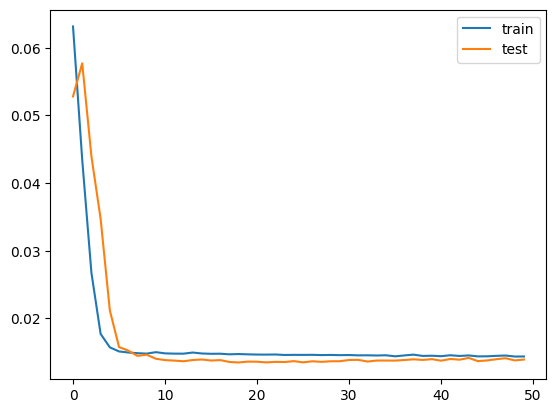

In [26]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [28]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [29]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.918
